# Deep learning from scratch: homework 1

## Xiaoyi Liu 3046670

### General instructions

Complete the exericse listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells.  

### When submitting this homework:

**Make sure you have put your name at the top of each file**
    
**Make sure all output is present in your notebook prior to submission**

**If possible please do not zip your files when uploading to canvas**

---

In [1]:
# import necessary library for this exercise
import autograd.numpy as np   
from autograd import value_and_grad 
import matplotlib.pyplot as plt

#### <span style="color:#a50e3e;">Exercise 5. </span>   Perform two-class classification on a breast cancer dataset

In this exercise you will repeat the experiment shown in [Section 9.4 of the class notes](https://jermwatt.github.io/mlrefined/blog_posts/8_Linear_regression/8_4_feature_scaling.html) comparing a run of gradient descent on standard and normalized data for two class classification using a real N=8 input breast cancer dataset, [a description of which you can find here](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original).  You should repeat this experiment precisely: including using the same number of steps for each run, the same steplength values and initializations, and by producing the same cost funciton / misclassification history plots for each run of gradient descent.  This dataset is loaded in the cell below.

In [2]:
# data input
data = np.loadtxt('breast_cancer_data.csv',delimiter = ',')

# get input and output of dataset
x = data[:,:-1].T
y = data[:,-1:] 

In [5]:
data

array([[  5.,   1.,   1., ...,   1.,   1.,   1.],
       [  5.,   4.,   4., ...,   2.,   1.,   1.],
       [  3.,   1.,   1., ...,   1.,   1.,   1.],
       ..., 
       [  5.,  10.,  10., ...,  10.,   2.,  -1.],
       [  4.,   8.,   6., ...,   6.,   1.,  -1.],
       [  4.,   8.,   8., ...,   4.,   1.,  -1.]])

In [82]:
def gradient_descent(g,alpha_choice,max_its,w):
    gradient = value_and_grad(g)
    weight_history = []      # container for weight history
    cost_history = []        # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice        
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)
        w = w - alpha*grad_eval            
    weight_history.append(w)
    cost_history.append(g(w))  
    return weight_history,cost_history

# compute linear combination of input point
def model(x,w):
    # tack a 1 onto the top of each input point all at once
    o = np.ones((1,np.shape(x)[1]))
    x = np.vstack((o,x))
    
    # compute linear combination and return
    a = np.dot(x.T,w)
    return a

# the convex softmax cost function
def softmax(w):
    cost = np.sum(np.log(1 + np.exp(-y*model(x,w))))
    return cost/float(len(y))

def softmax_normalized(w):
    cost = np.sum(np.log(1 + np.exp(-y*model(x_normalized,w))))
    return cost/float(len(y))

In [79]:
def standard_normalizer(x):
    # compute the mean and standard deviation of the input
    x_means = np.mean(x,axis = 1)[:,np.newaxis]
    x_stds = np.std(x,axis = 1)[:,np.newaxis]   

    # create standard normalizer function based on input data statistics
    normalizer = lambda data: (data - x_means)/x_stds
    
    # return normalizer and inverse_normalizer
    return normalizer

# return normalization functions based on input x
normalizer = standard_normalizer(x)

# normalize input by subtracting off mean and dividi`ng by standard deviation
x_normalized = normalizer(x)

In [120]:
w = 0.1*np.random.randn(9,1)
max_iters = 100
learning_rate = 0.1

In [121]:
weight_history,cost_history = gradient_descent(softmax, learning_rate, max_iters, w)
weight_history_normalized, cost_history_normalized = gradient_descent(softmax_normalized,
                                                             learning_rate, max_iters, w)

In [123]:
weight_history[max_iters]

array([[ 1.18496273],
       [ 0.1074455 ],
       [-0.55787094],
       [-0.31105953],
       [-0.19141654],
       [ 0.43442667],
       [ 0.15690613],
       [-0.25929918],
       [ 0.19897129]])

In [124]:
np.ones((1,1)).shape

(1, 1)

In [126]:
model(x[:,1].reshape(8,1),weight_history[max_iters])

array([[ 0.48146372]])

In [127]:
# the counting cost function
def counting_cost(w):
    cost = np.sum((np.sign(model(x,w)) - y)**2)
    return 0.25*cost 

def counting_cost_normalized(w):
    cost = np.sum((np.sign(model(x_normalized,w)) - y)**2)
    return 0.25*cost 

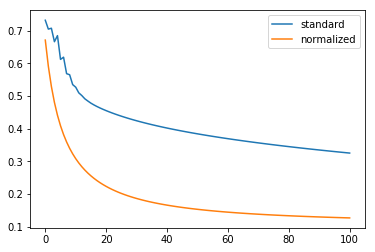

In [149]:
plt.figure()
plt.plot(np.arange((len(cost_history))),cost_history, label='standard')
plt.plot(np.arange((len(cost_history))), cost_history_normalized,label='normalized')
plt.legend()
plt.show()

In [132]:
misclass_history = [counting_cost(weight_history[n]) for n in range(1+max_iters)]
misclass_history_normalized = [counting_cost_normalized(weight_history_normalized[n])
                               for n in range(1+max_iters)]

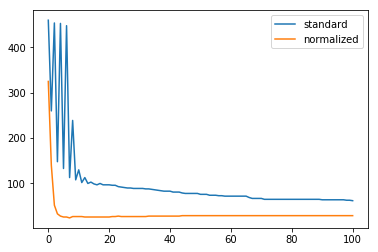

In [151]:
plt.figure()
plt.plot(np.arange((len(misclass_history))), misclass_history, label='standard')
plt.plot(np.arange((len(misclass_history))), misclass_history_normalized,label='normalized')
plt.legend()
plt.show()

In [135]:
print(misclass_history[max_iters], misclass_history_normalized[max_iters])

62.0 29.0


In [136]:
index_best = np.argmin(misclass_history_normalized)

In [137]:
index_best

7

In [139]:
misclass_history_normalized[index_best]   # Question?? why the index for best fitting is only 7??

24.0

Note that you can find effecient `Python` implementations of both the softmax cost function [in Section 9.1.2](https://jermwatt.github.io/mlrefined/blog_posts/9_Linear_twoclass_classification/9_1_Logistic_regression.html) and the counting cost (for producing the number of misclassifications) [in Section 9.1.4](https://jermwatt.github.io/mlrefined/blog_posts/9_Linear_twoclass_classification/9_1_Logistic_regression.html) of the course notes.  Use these to produce both a plot of the cost function and misclassification count history for each run of gradient descent as shown in the example.